
# Sensitivity Analysis of KBA Ecosystem Criteria

### A Study Project in Collaboration with NatureServe

* **Christy Sandberg**, *analytical work, research*
* **Eric Nutt**, *data managment*
* **Lana Kurakina**, *GIS and spatial data processing support*
* **Elsa Culler**, *mentor*
* **Pat Comer**, *project partner*


# Importance of the Topic

Systematic **Conservation Planning** is a field of research that uses GIS and Python for spatial analysis, with the purpose of strategically identifying areas that meet a given conservation goal.  

Scientists bring together collected data from a variety of biological and ecological sources and execute an iterative workflow to define areas that successfully meet the required criteria. These data sources can include:

* species populations, 
* vegetative land cover, 
* nesting sites, 
* seasonal feeding patterns 
* or even the location of historic cultural heritage sites.  

Results of the analysis are shared with key stakeholders and decision makers, enabling them to efficiently direct limited resources towards solutions with the lowest cost and greatest chance for long term ecological success.




# Other Work Done in the Area

This is a critical time for conservation, as many ecosystems across the globe are at risk of being lost due to deforestation, construction, large-scale agriculture, human encroachment, climate change etc. There are multiple agencies and organizations working on both a regional and global level to fast-track conservation efforts.  

In 2021, U.S. President Biden launched the *‘America the Beautiful’* initiative, with the stated goal of conserving at least 30 percent of U.S. lands and waters by 2030.  Globally, the  International Union for Conservation of Nature (IUCN) has been working since 2004 on a standard for identifying **Key Biodiversity Areas (KBAs)**, which are defined as areas essential to supporting the persistence of global biodiversity at either a species or ecosystem level. Once **KBAs** are established and the information is shared with stakeholders, that area becomes prioritized for conservation planning.

The IUCN is aware their KBA standard will evolve over time, and actively seeks input from users who work with the current criteria and may have suggestions for improvement. Our project sponsor **Pat Comer** is a member of the IUCN **Commission on Ecosystem Management**, and is interested in whether the current thresholds adequately allow for **KBAs** to be defined for all ecosystems.

Currently, the standard is set so that a **KBA** can be identified at a site that comprises **10%** of the global extent of an ecosystem defined as **‘Vulnerable’** by the IUCN Red List of Ecosystems (RLE), or at **5%** when the ecosystem is at the higher risk **‘Critical’** or **‘Endangered’** level.

We would like to investigate if these **current thresholds may be set too high, especially for ecosystems with linear or fragmented spatial characteristics**. In these instances, it can be difficult to locate independent areas large enough to qualify for conservation using the current standard, or that are in close enough proximity to other areas to allow them to be managed together as a single conservation unit. 

The question we are researching is whether lower thresholds would be more successful in identifying KBAs for ecosystems with such spatial characteristics. If so, that may be a useful revision for the IUCN to make to their standard, as ultimately the goal is to identify KBAs for all threatened ecosystems.



# Methods

## Data Sources

1. LANDFIRE, 2016, **Existing Vegetation Type Layer**, LANDFIRE 2.0.0, U.S. Department of the Interior, Geological Survey, and U.S. Department of Agriculture. Accessed 28 October 2021 at http://www.landfire/viewer.
2. **Nested Hexagon Framework (NHF)**, developed by Mike Houts at the University of Kansas, provided by Pat Comer.

## Software, Libraries, Packages 

* Apropos Information Systems Inc. **ArcMarxan Toolbox**, Version 2.0.2; Available at https://aproposinfosystems.com/
* **QMarxan Toolbox**, Version 2.0.1
* Ball, I.R., H.P. Possingham, and M. Watts. 2009. **Marxan** and relatives: Software for spatial conservation prioritisation. Chapter 14: Pages 185-195 in Spatial conservation prioritisation: Quantitative methods and computational tools. Eds Moilanen, A., K.A. Wilson, and H.P. Possingham. Oxford University Press, Oxford, UK; Available at https://marxansolutions.org/software/
* QGIS Association. **QGIS** version 3.22.5-Białowieża, 2022. QGIS Geographic Information System. Available at http://www.qgis.org
* **CLUZ**, CLUZ plugin for QGIS v3 CLUZ. Conservation Land-Use Zoning software developed by Bob Smith from the Durrell Institute of Conservation and Ecology (DICE), and funded by the UK Government's Darwin Initiative. Available at  http://anotherbobsmith.wordpress.com/software/cluz/
* J. D. Hunter, "**Matplotlib**: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.
* Harris CR, Millman KJ, van der Walt SJ, Gommers R, Virtanen P, Cournapeau D, et al. Array programming with **NumPy**. Nature. 2020;585:357–62.
* Kelsey Jordahl, et al. **Geopandas** Version v0.8.1. Zenodo. http://doi.org/10.5281/zenodo.3946761
* Hoyer, S. & Hamman, J., (2017). **xarray**: N-D labeled Arrays and Datasets in Python. Journal of Open Research Software. 5(1), p.10. DOI: https://doi.org/10.5334/jors.148
* **Rioxarray**. Geospatial xarray extension pwered by rasterio. Avaialable at https://corteva.github.io/rioxarray/stable/
* **EarthPy**. A Python Package for Earth Data. Avaialable at https://earthpy.readthedocs.io/en/latest/index.html



# Workflow Steps Completed

1. Extract raster files featuring individual ecosystems from a national raster dataset (Landfire, 2016).
2. Use NHF to prepare planning unit shapefiles.
3. Use ArcMarxan/Qmarxan Toolbox to prepare input files for Marxan.
4. Perform trial run of Marxan 4.06 using default input parameters.
5. Repeat multiple runs of Marxan adjusting input parameters, such as conservation target.
6. Visualize results.


# Study Area

Currently our study area includes continental US. For the trial run we used nine ecosystems with diverse spatial characteristics:
* Atlantic Coastal Plain Fall-line Sandhills Longleaf Pine Woodland
* Central Tallgrass Prairie
* Columbia Basin Palouse Prairie
* Crowley's Ridge Mesic Loess Slope Forest
* East Gulf Coastal Plain Northern Loess Bluff Forest
* Northern Atlantic Coastal Plain Tidal Salt Marsh
* South Florida Cypress Dome
* Southwest Florida Dune and Coastal Grassland
* Western Great Plains Foothill and Piedmont Grassland

In [1]:
# Import libraries
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
from rasterio.plot import plotting_extent
import earthpy as et

# Set working directory
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

(-2586827.152087886, 2488867.850089356, 115760.23776860186, 3310957.9078612914)

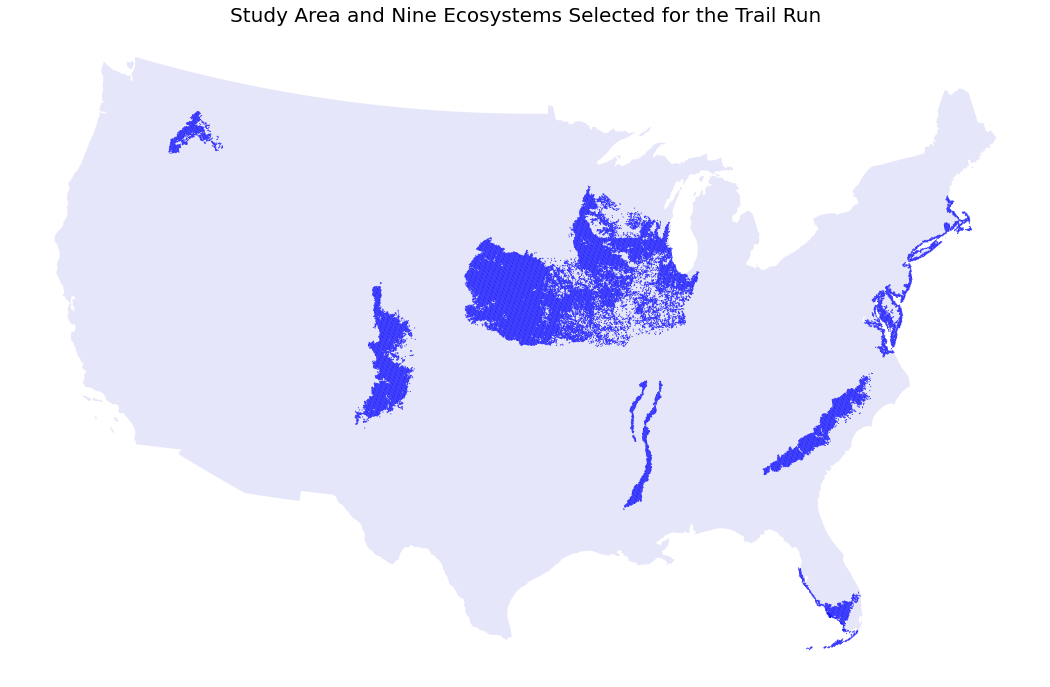

In [2]:
# Study Area
study_area = gpd.read_file(os.path.join('natureserve',
                                        'study_area',
                                        'us_bound_albers.shp'))

# Set paths to hexes
path_hex = os.path.join('natureserve', 'shp_hex')
ecosytem_hex_paths = sorted(glob(os.path.join(path_hex, '*.shp')))

# Plot the Study Area
fig, ax = plt.subplots(figsize=(20, 12))
ax.set_title('Study Area and Nine Ecosystems Selected for the Trail Run',
             fontsize=20)

for afile in ecosytem_hex_paths:
    shp = gpd.read_file(afile)
    shp.plot(ax=ax, color='blue', zorder=2)

study_area.plot(ax=ax, facecolor='lavender', zorder=1)

ax.axis('off')

# Example of the Workflow Trial Run

In [3]:
# Set paths to raster data
path_raster = os.path.join('natureserve', 'raster')

# In case if all rasters in a folder need to be read/plotted
ecosytem_rasters = sorted(glob(os.path.join(path_raster, '*.tif')))

# Raster Featuring Individual Ecosystem

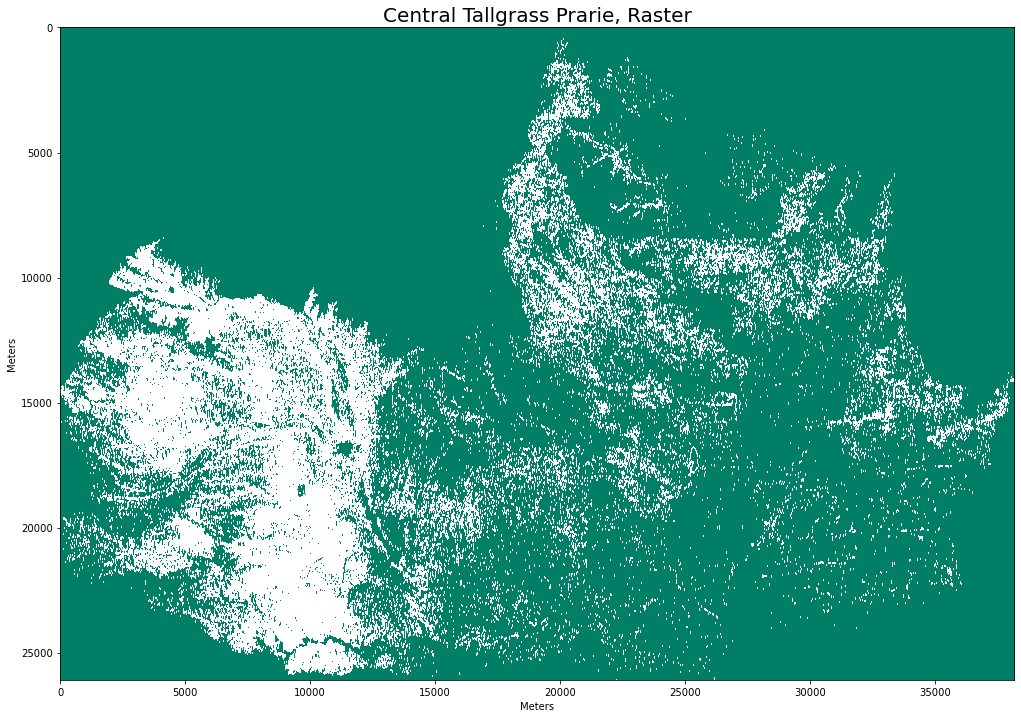

In [4]:
# Read individual raster
tallgrass_r = rxr.open_rasterio(os.path.join(path_raster,
                                             'tallgrass_r.tif')).squeeze()

# Create mask to visalize nodata raster cells
tallgrass_r_ma = (
    np.ma.masked_where(
        tallgrass_r != tallgrass_r.rio.nodata, tallgrass_r, copy=True))

# Visualize individual ecosystem raster
fig, ax = plt.subplots(figsize=(20, 12))
ax.set_title('Central Tallgrass Prarie, Raster', fontsize=20)
ax.set(xlabel='Meters',
       ylabel='Meters')
plot = ax.imshow(tallgrass_r_ma, cmap='summer')
plt.show()

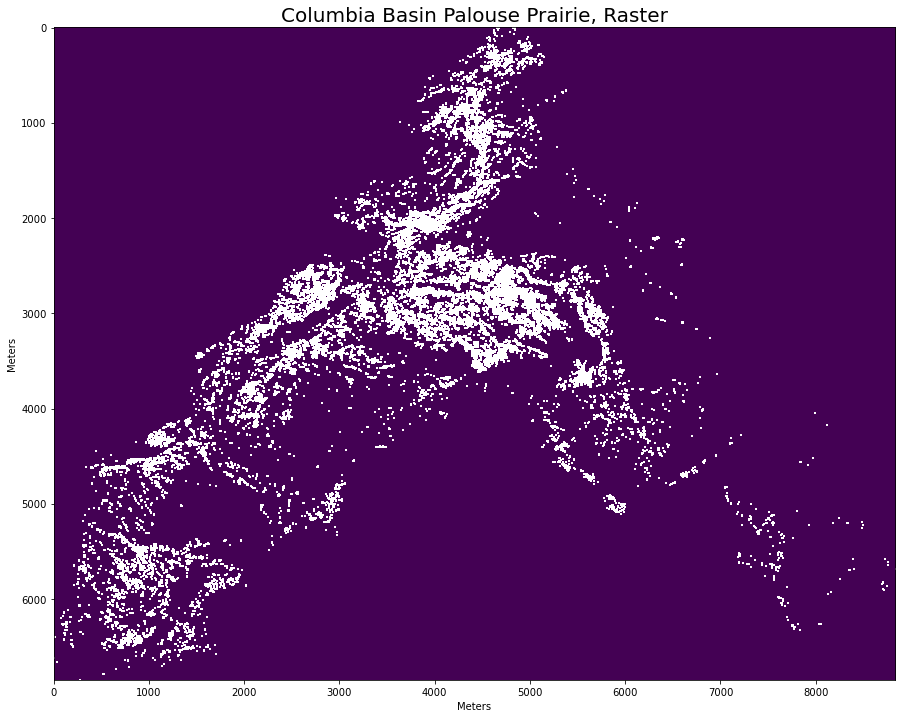

In [5]:
# Read individual raster
prarie_r = rxr.open_rasterio(os.path.join(path_raster,
                                          'prarie_r.tif')).squeeze()

# Create mask to visalize nodata raster cells
prarie_r_ma = (
    np.ma.masked_where(
        prarie_r != prarie_r.rio.nodata, prarie_r, copy=True))

# Visualize individual ecosystem raster
fig, ax = plt.subplots(figsize=(20, 12))
ax.set_title('Columbia Basin Palouse Prairie, Raster', fontsize=20)
plot = ax.imshow(prarie_r_ma)
ax.set(xlabel='Meters',
       ylabel='Meters')
plt.show()

# Planning Unit Shapefile

<AxesSubplot:title={'center':'Central Tallgrass Prarie, Planning Units'}, xlabel='Meters', ylabel='Meters'>

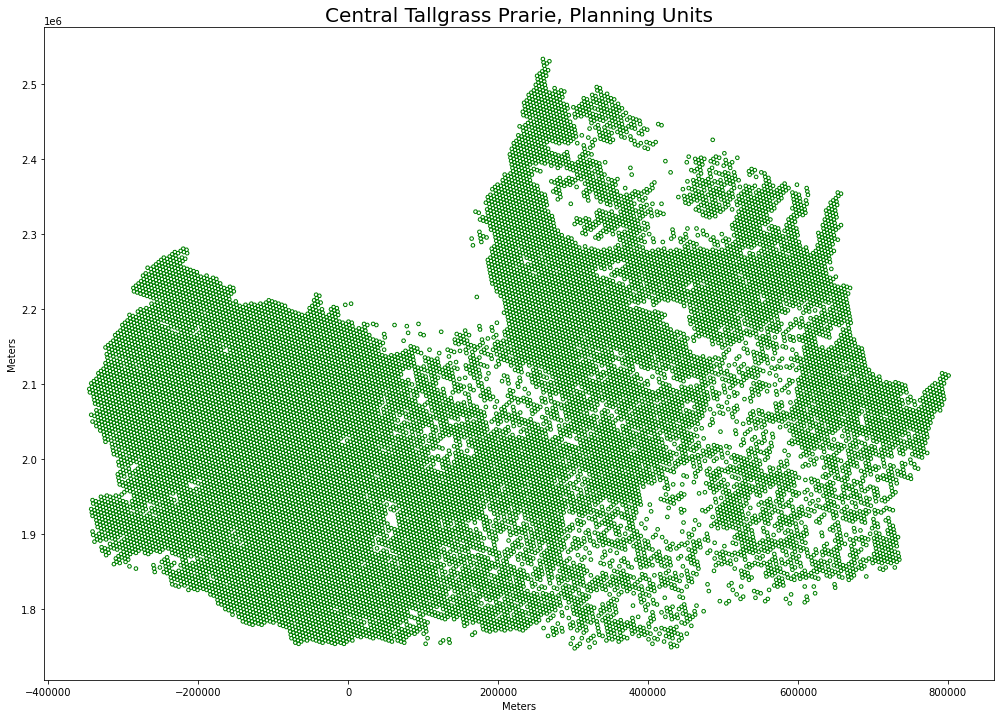

In [6]:
# Read individual planning unit shape file
tallgrass_v = gpd.read_file(os.path.join('natureserve',
                                         'shp_hex',
                                         'tallgrass_hex.shp'))

# Visualize individual planning unit shape file
fig, ax = plt.subplots(figsize=(20, 12))
ax.set_title('Central Tallgrass Prarie, Planning Units', fontsize=20)
ax.set(xlabel='Meters',
       ylabel='Meters')
tallgrass_v.plot(ax=ax, color='none', edgecolor='green')

<AxesSubplot:title={'center':'Columbia Basin Palouse Prairie, Planning Units'}, xlabel='Meters', ylabel='Meters'>

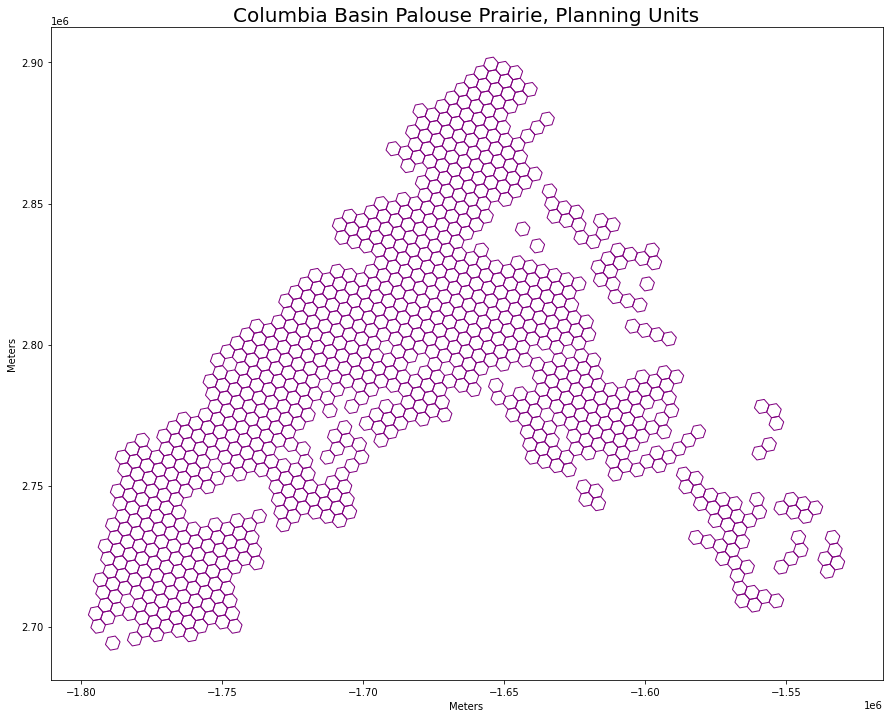

In [7]:
prarie_v = gpd.read_file(os.path.join('natureserve',
                                      'shp_hex',
                                      'prarie_hex.shp'))
fig, ax = plt.subplots(figsize=(20, 12))
ax.set_title('Columbia Basin Palouse Prairie, Planning Units', fontsize=20)
ax.set(xlabel='Meters',
       ylabel='Meters')
prarie_v.plot(ax=ax, color='none', edgecolor='purple')

# Use Planning Unit Shapefile and Raster to Run Zonal Stats Analysis

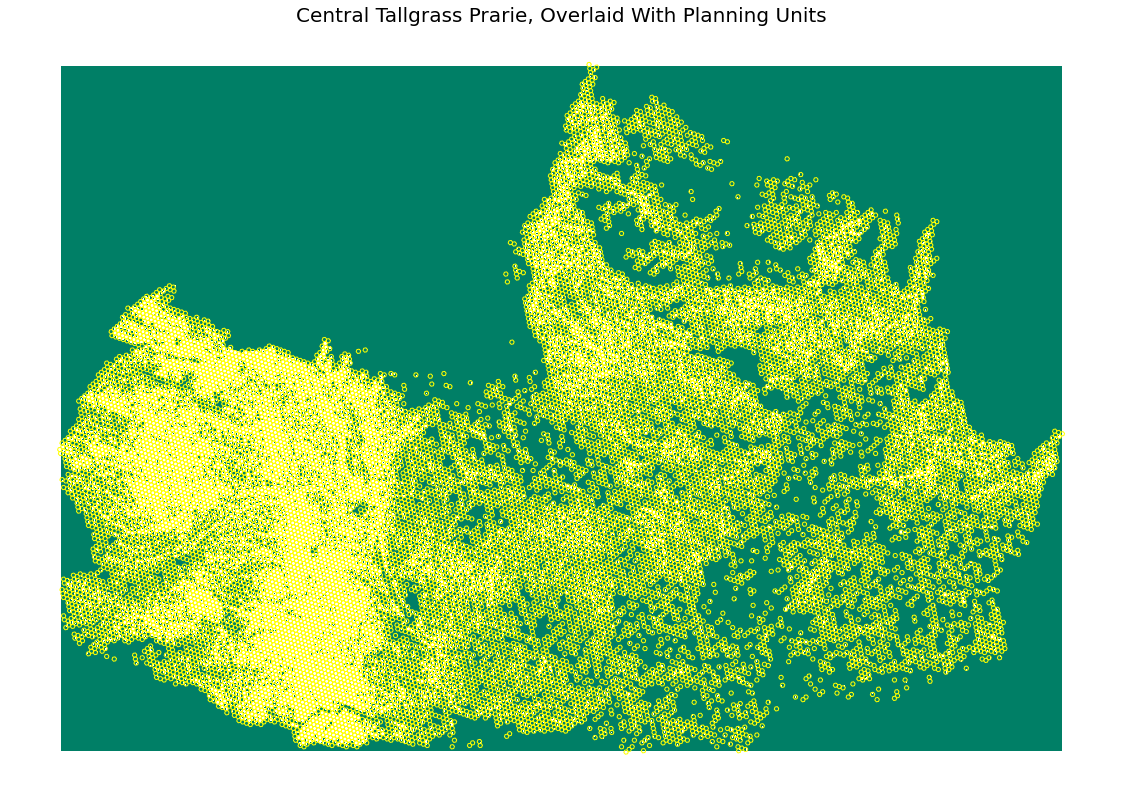

In [8]:
# Set plotting extent
tallgrass_extent = plotting_extent(tallgrass_r, tallgrass_r.rio.transform())

# Visualize overlay of individual ecosystem raster and planning units
fig, ax = plt.subplots(figsize=(22, 14))
ax.set_title('Central Tallgrass Prarie, Overlaid With Planning Units',
             fontsize=20)
plot = ax.imshow(tallgrass_r_ma, cmap='summer', extent=tallgrass_extent)
tallgrass_v.plot(ax=ax, color='none', edgecolor='yellow')
ax.axis('off')
plt.show()

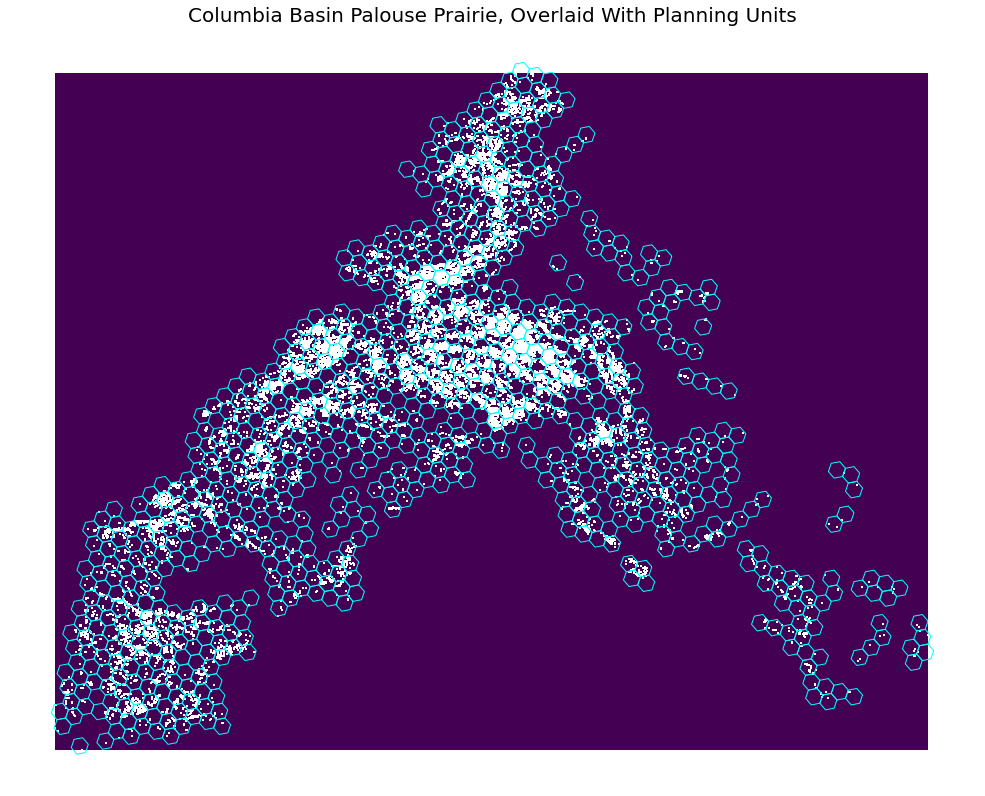

In [9]:
# Set plotting extent
prarie_extent = plotting_extent(prarie_r, prarie_r.rio.transform())
prarie_extent

# Visualize overlay of individual ecosystem raster and planning units
fig, ax = plt.subplots(figsize=(22, 14))
ax.set_title('Columbia Basin Palouse Prairie, Overlaid With Planning Units',
             fontsize=20)
plot = ax.imshow(prarie_r_ma, extent=prarie_extent)
prarie_v.plot(ax=ax, color='none', edgecolor='cyan')
ax.axis('off')
plt.show()

# Visualize Results of Zonal Stats Analysis

(-405727.24308490753, 861196.5245847702, 1705617.5982001543, 2576009.613000083)

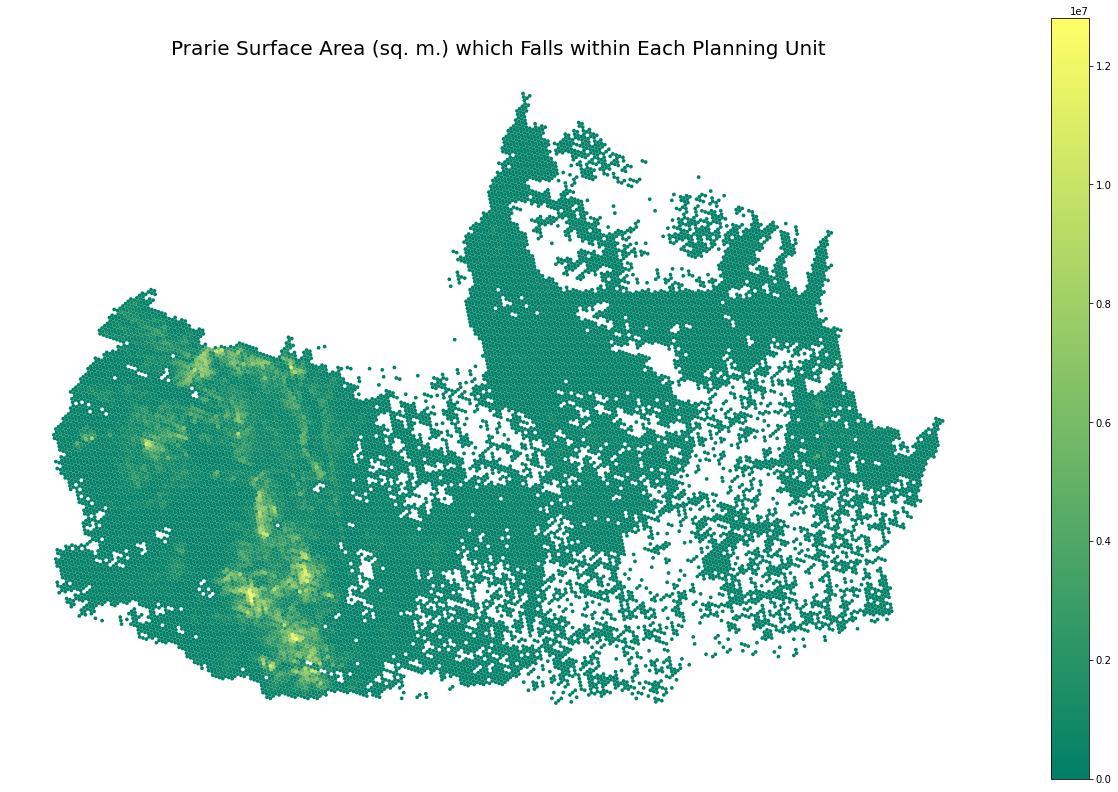

In [13]:
tallgrass_marxan = gpd.read_file(os.path.join('natureserve',
                                              'marxan_prep',
                                              'tallgrass',
                                              'pulayerfeatures.shp'))
fig, ax = plt.subplots(figsize=(22, 14))
ax.set_title('Prarie Surface Area (sq. m.) which Falls within \
Each Planning Unit', fontsize=20)
tallgrass_marxan.plot(column='VALUE_7421', ax=ax, cmap='summer', legend=True)
ax.axis('off')

(-1810739.8217100264,
 -1515885.191089952,
 2681195.5020201444,
 2912384.8005802394)

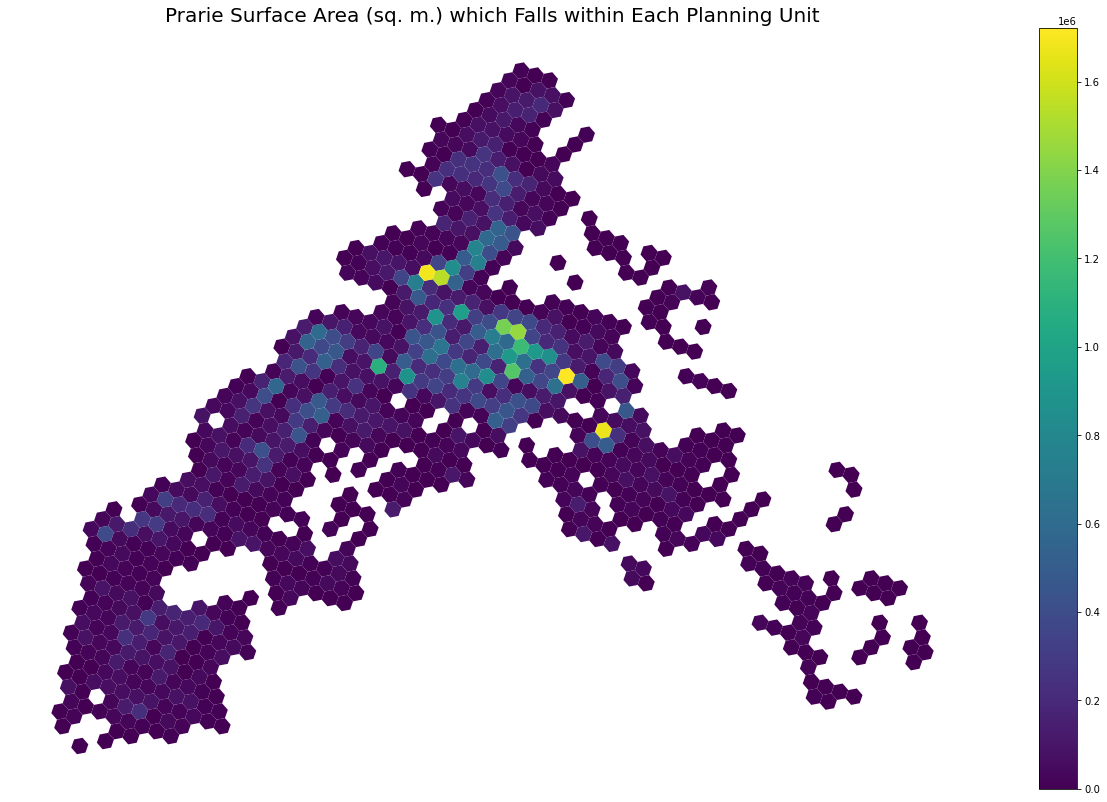

In [14]:
# Visualize results
prarie_marxan = gpd.read_file(os.path.join('natureserve',
                                           'marxan_prep',
                                           'prarie',
                                           'pulayerfeatures.shp'))
prarie_marxan
fig, ax = plt.subplots(figsize=(22, 14))
ax.set_title('Prarie Surface Area (sq. m.) which Falls within \
Each Planning Unit', fontsize=20)
prarie_marxan.plot(column='VALUE_7142', ax=ax, legend=True)
ax.axis('off')

# Conclusions

We are aiming to conduct a sensitivity analysis of the current thresholds set by the IUCN for KBA identification. This will allow us to see if a lower threshold will be more effective in identifying areas to prioritize for conservation.
 
If we find lower thresholds are helpful in identifying KBAs for ecosystems with linear or fragmented spatial characteristics, this could be presented to the IUCN for inclusion in a future revision to the KBA standard which would lead to our findings being used globally. 

Systematic conservation planning relies on a complex annealing algorithm function that accounts for a number of variables. This algorithm can be applied to a variety of conditions, depending on the input factors.  The question of how to determine which input factors return the best outcomes can be capably answered using an iterative Python workflow to help manage the complexities and analyze the outcomes. An additional benefit of our Python workflow is that it will enable interested parties to review our results in an objective, repeatable and transparent way, or even use their own source data for a similar sensitivity analysis.
 

# Questions to Explore

We are left with several questions at the end of this initial project phase:

* Most obviously, how can we improve the workflow? Any open-source scientific workflow has room for improvement. 

* Can the entire workflow be completed in Python, or is a GIS software necessary? If it can, how? What tools are necessary? 

* How will the spatial characteristics of the ecosystems be analyzed affect their calculated KBA status?

# Moving Forward
1. Investigate API capabilities at http://www.landfire/viewer
2. Test Cluz (QGIS plugin) capabilities to prepare Marxan Input files and visualize results.
3. Try executing Marxan runs using Python/Jupyter notebook.
4. Develop a reproducable workflow allowing to visualize results of Marxan runs.
5. Set a publicly accessible data storage.


# Export Notebook as HTML File

In [1]:
! jupyter nbconvert final-project-group-blog-post-natureserve.ipynb --no-input --to html

[NbConvertApp] Converting notebook final-project-group-blog-post-natureserve.ipynb to html
[NbConvertApp] Writing 4751034 bytes to final-project-group-blog-post-natureserve.html
